# [프로젝트] 요소수 유통 주유소 재고 현황 데이터

## 프로젝트 목표
---
- 요소수 유통 주유소 재고 현황 데이터를 살펴보고 유의미한 데이터를 불러온다.
- 데이터를 지도에 표출하여 요소수 재고 현황을 조회할 수 있는 서비스를 제작한다.

## 프로젝트 목차
---
1. **데이터 불러오기:** csv 데이터를 불러온 후 DataFrame구조를 확인한다.
2. **데이터 전처리하기:** 유의미한 데이터를 제공하기 위해 데이터를 전처리한다.
3. **데이터 분석하기:** 다양한 방법으로 데이터를 파헤치고 통계를 구한다.
4. **데이터 시각화하기:** 지도에 데이터를 표출하여 요소수 재고 현황 조회 서비스를 제공한다.

## 1. 데이터 불러오기

In [12]:
import numpy as np
import pandas as pd

df = pd.read_csv('./Urea data.csv')
df

,addr,code,color,inventory,lat,lng,name,openTime,price,regDt,tel
0,경기 광명시 오리로 608 (소하동),A0000004,GREEN,1700,37.456201,126.880407,(주)지에스이앤알 직영 하안단지주유소,NaN,2000,2021-12-28 10:23:15,02-899-5202
1,경기 용인시 기흥구 흥덕중앙로 92,A0000012,GREEN,3228,37.275967,127.077150,(주)지에스이앤알 흥덕주유소,NaN,2000,2021-12-28 06:06:12,031-215-8053
2,충남 부여군 내산면 서천공주고속도로 26,A0000052,GRAY,0,36.258064,126.800203,부여백제(공주)주유/충전소,NaN,1500,2021-12-28 11:11:38,041-833-8300
3,충남 공주시 당진영덕고속도로 72-1,A0000053,YELLOW,791,36.497380,127.168437,공주(대전)휴게소 주유소,NaN,1000,2021-12-28 09:01:09,041-854-9728
4,충남 공주시 의당면 당진영덕고속도로 69,A0000054,YELLOW,762,36.498579,127.165047,공주(당진)휴게소주유소/충전소,NaN,1000,2021-12-28 13:56:33,041-854-9504
...,...,...,...,...,...,...,...,...,...,...,...
195,인천 서구 중봉대로 148,A0008072,GREEN,2510,37.492677,126.648296,한밭산업㈜ 청라주유소,NaN,1500,2021-12-28 12:02:05,032-575-5261
196,인천 서구 봉수대로 1543 (금곡동),A0008107,YELLOW,972,37.609760,126.643827,(주)디오티디 인천랍스터주유소,NaN,2000,2021-12-28 11:19:25,032-567-5185
197,경기 의왕시 오봉로 182 (부곡동),A0008150,GREEN,1912,37.334862,126.960332,현대오일뱅크(주)직영 의왕셀프주유소,NaN,2000,2021-12-28 09:08:34,031-461-8204
198,경기 의왕시 창말로 39,A0008176,YELLOW,200,37.336115,126.953993,의왕아이시디주유소,"08:00~20:00(평일), 08:00~16:00(토)일요일휴무",1500,2021-12-28 11:13:41,031-461-8005


## 2. 데이터 전처리하기

In [13]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   addr       200 non-null    object 
 1   code       200 non-null    object 
 2   color      200 non-null    object 
 3   inventory  200 non-null    int64  
 4   lat        200 non-null    float64
 5   lng        200 non-null    float64
 6   name       200 non-null    object 
 7   openTime   13 non-null     object 
 8   price      200 non-null    int64  
 9   regDt      200 non-null    object 
 10  tel        200 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 17.3+ KB


In [14]:
df = df.drop('openTime',axis=1)
df

,addr,code,color,inventory,lat,lng,name,price,regDt,tel
0,경기 광명시 오리로 608 (소하동),A0000004,GREEN,1700,37.456201,126.880407,(주)지에스이앤알 직영 하안단지주유소,2000,2021-12-28 10:23:15,02-899-5202
1,경기 용인시 기흥구 흥덕중앙로 92,A0000012,GREEN,3228,37.275967,127.077150,(주)지에스이앤알 흥덕주유소,2000,2021-12-28 06:06:12,031-215-8053
2,충남 부여군 내산면 서천공주고속도로 26,A0000052,GRAY,0,36.258064,126.800203,부여백제(공주)주유/충전소,1500,2021-12-28 11:11:38,041-833-8300
3,충남 공주시 당진영덕고속도로 72-1,A0000053,YELLOW,791,36.497380,127.168437,공주(대전)휴게소 주유소,1000,2021-12-28 09:01:09,041-854-9728
4,충남 공주시 의당면 당진영덕고속도로 69,A0000054,YELLOW,762,36.498579,127.165047,공주(당진)휴게소주유소/충전소,1000,2021-12-28 13:56:33,041-854-9504
...,...,...,...,...,...,...,...,...,...,...
195,인천 서구 중봉대로 148,A0008072,GREEN,2510,37.492677,126.648296,한밭산업㈜ 청라주유소,1500,2021-12-28 12:02:05,032-575-5261
196,인천 서구 봉수대로 1543 (금곡동),A0008107,YELLOW,972,37.609760,126.643827,(주)디오티디 인천랍스터주유소,2000,2021-12-28 11:19:25,032-567-5185
197,경기 의왕시 오봉로 182 (부곡동),A0008150,GREEN,1912,37.334862,126.960332,현대오일뱅크(주)직영 의왕셀프주유소,2000,2021-12-28 09:08:34,031-461-8204
198,경기 의왕시 창말로 39,A0008176,YELLOW,200,37.336115,126.953993,의왕아이시디주유소,1500,2021-12-28 11:13:41,031-461-8005


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   addr       200 non-null    object 
 1   code       200 non-null    object 
 2   color      200 non-null    object 
 3   inventory  200 non-null    int64  
 4   lat        200 non-null    float64
 5   lng        200 non-null    float64
 6   name       200 non-null    object 
 7   price      200 non-null    int64  
 8   regDt      200 non-null    object 
 9   tel        200 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 15.8+ KB


In [18]:
inven_mean = df['inventory'].mean()
print(f'재고량 평균은 {inven_mean:.2f}개')

재고량 평균은 1371.32개


In [20]:
df['inventory'].sort_values()[:5] # 재고량 하위 5개

180    0
22     0
165    0
113    0
47     0
Name: inventory, dtype: int64

In [22]:
df['inventory'].sort_values()[-5:] # 재고량 상위 5개

90     4000
168    4000
28     4900
33     5210
183    6900
Name: inventory, dtype: int64

In [23]:
price_mean = df['price'].mean()
print(f'가격 평균은 {price_mean:.2f}원') # 가격 평균

가격 평균은 1738.50원


In [24]:
df['price'].sort_values()[:5] # 리터당 가격 하위 5개

59    1000
3     1000
4     1000
47    1000
58    1200
Name: price, dtype: int64

In [25]:
df['price'].sort_values()[-5:] # 리터당 가격 상위 5개

6      2400
169    2500
191    2500
14     3000
152    3000
Name: price, dtype: int64

## 3. 데이터 분석하기

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

### 3-1. 지역별 요소수 유통 주유소 분포 알아보기

In [31]:
# 국내 지역번호 리스트 생성
list_tel = ['02', '031', '032', '033', '041', '042', '043', '044', '051', '052', '053', '054', '055', '061', '062', '063', '064']
df_region_by_tel = pd.Series(np.zeros(len(list_tel),dtype = np.int64),index=list_tel)
print(df_region_by_tel)

# 지역별 요소수 유통 주유소 수 세기
for i in list_tel:
    df_region_by_tel[i] = df['tel'].str.startswith(i).sum()
    
df_region_by_tel

02     0
031    0
032    0
033    0
041    0
042    0
043    0
044    0
051    0
052    0
053    0
054    0
055    0
061    0
062    0
063    0
064    0
dtype: int64


02       3
031    148
032     28
033      1
041     10
042      0
043      3
044      0
051      1
052      0
053      0
054      2
055      0
061      1
062      0
063      3
064      0
dtype: int64

In [32]:
# 문자열을 입력받아 첫번째 단어를 추출하는 간단한 보조함수를 먼저 정의합니다.
def extract(string):
    return string.split()[0]

addrs = df['addr'].apply(extract)
addrs

0      경기
1      경기
2      충남
3      충남
4      충남
       ..
195    인천
196    인천
197    경기
198    경기
199    경기
Name: addr, Length: 200, dtype: object

In [34]:
addrs_cnt = addrs.value_counts().sort_values(ascending=False)
addrs_cnt

경기       144
인천        25
충남        10
경기도        6
전북         3
충북         3
경북         2
평택시        2
부산         1
서울         1
인천광역시      1
강원         1
전남         1
Name: addr, dtype: int64

In [37]:
addrs_cnt_df = pd.DataFrame(addrs_cnt).rename(columns={'addr':'counts'})
addrs_cnt_df
# addrs_cnt_df.info()

,counts
경기,144
인천,25
충남,10
경기도,6
전북,3
충북,3
경북,2
평택시,2
부산,1
서울,1


In [38]:
def merge_rows(df,rowA,rowB):
    cnt = df.loc[rowB]
    df.loc[rowA] += cnt
    df = df.drop(rowB)
    return df

addrs_cnt_df = merge_rows(addrs_cnt_df,'인천','인천광역시')
addrs_cnt_df
addrs_cnt_df = merge_rows(addrs_cnt_df,'경기','경기도')
addrs_cnt_df

,counts
경기,144
인천,26
충남,10
경기도,6
전북,3
충북,3
경북,2
평택시,2
부산,1
서울,1


### 3-2. 요소수 재고 레벨 분포 알아보기

Text(0, 0.5, 'count')

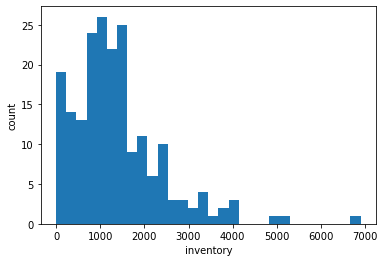

In [41]:
fig,ax = plt.subplots()
ax.hist(df['inventory'],bins=30)
ax.set_xlabel('inventory')
ax.set_ylabel('count')

요소수 재고량의 평균은 1371.315개입니다.


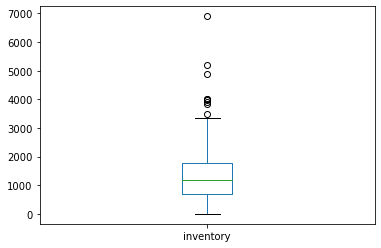

In [42]:
df.boxplot(column='inventory',grid=False) # boxplot 생성

inven_mean = df['inventory'].mean() # 평균값 계산
print(f'요소수 재고량의 평균은 {inven_mean}개입니다.') # 문자열 포맷팅

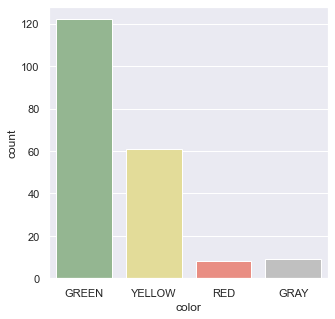

In [46]:
plt.figure(figsize=(5,5))
sns.set(style='darkgrid')
ax=sns.countplot(x='color',data=df,palette=['#8FBC8B', '#F0E68C', '#FA8072', '#C0C0C0'], order=['GREEN', 'YELLOW', 'RED', 'GRAY'])

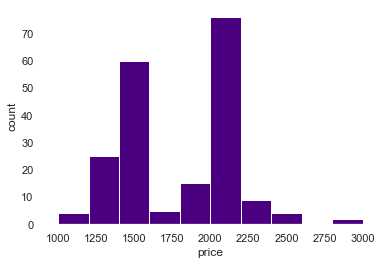

In [47]:
fig,ax = plt.subplots()
ax.hist(df['price'],bins=10,color='indigo')
ax.set_xlabel('price')
ax.set_ylabel('count')
ax.set_facecolor('white')

요소수 가격의 평균은 1738.5원입니다.


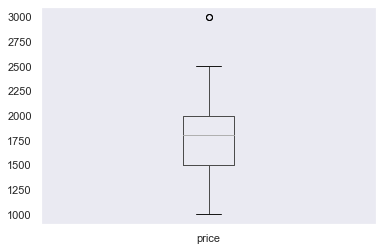

In [48]:
df.boxplot(column='price',grid=False)
price_mean = df['price'].mean()
print(f'요소수 가격의 평균은 {price_mean:.1f}원입니다.')

### 3-4. 요소수 가격과 재고의 상관관계 알아보기

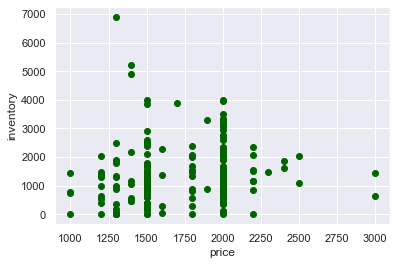

In [49]:
fig,ax = plt.subplots()
ax.scatter(df['price'],df['inventory'],color='darkgreen')
ax.set_xlabel('price')
ax.set_ylabel('inventory')
plt.show()

In [50]:
corr = df.corr(method='pearson')['inventory']['price']
print(f'가격과 재고량 사이의 피어슨 상관계수는 {corr:.3f}입니다.')

가격과 재고량 사이의 피어슨 상관계수는 0.099입니다.


### 3-5. 주유소 이름에서 패턴 찾아보기

In [51]:
def price_insight(keyword,diff):
    if diff > 0:
        print(f'{keyword} 주유소의 요소수 가격은 전체 평균에 비해 {diff:.2f}원 저렴합니다.')
    else:
        print(f'{keyword} 주유소의 요소수 가격은 전체 평균에 비해 {-diff:.2f}원 비쌉니다.')
        

def inven_insight(keyword,diff):
    if diff > 0:
        print(f'{keyword} 주유소의 요소수 재고량은 전체 평균에 비해 {diff:.2f}만큼 적습니다.')
    else:
        print(f'{keyword} 주유소의 요소수 재고량은 전체 평균에 비해 {-diff:.2f}만큼 많습니다.')        

In [52]:
tdf = df[df.name.str.contains('휴게소')]
tdf

,addr,code,color,inventory,lat,lng,name,price,regDt,tel
3,충남 공주시 당진영덕고속도로 72-1,A0000053,YELLOW,791,36.497380,127.168437,공주(대전)휴게소 주유소,1000,2021-12-28 09:01:09,041-854-9728
4,충남 공주시 의당면 당진영덕고속도로 69,A0000054,YELLOW,762,36.498579,127.165047,공주(당진)휴게소주유소/충전소,1000,2021-12-28 13:56:33,041-854-9504
180,경기 용인시 처인구 이동면 남북대로 2616,A0007236,GRAY,0,37.140624,127.205600,송전휴게소주유소/충전소,1500,2021-12-28 14:12:48,031-335-4194


In [53]:
price_diff = df.price.mean() - tdf.price.mean()
price_insight('휴게소',price_diff)

휴게소 주유소의 요소수 가격은 전체 평균에 비해 571.83원 저렴합니다.


In [54]:
inven_diff = df.inventory.mean() - tdf.inventory.mean()
inven_insight('휴게소',inven_diff)

휴게소 주유소의 요소수 재고량은 전체 평균에 비해 853.65만큼 적습니다.


In [55]:
tdf = df[df.name.str.contains('셀프')]
print(f'셀프 주유소 관측값 수 : {tdf.shape[0]}')
tdf.head()

셀프 주유소 관측값 수 : 15


,addr,code,color,inventory,lat,lng,name,price,regDt,tel
40,경기 평택시 경기대로 1078 (장당동),A0002027,YELLOW,800,37.042878,127.062331,동일석유(주) 금성셀프주유소,1800,2021-12-28 12:55:53,031-665-0190
57,경기 용인시 처인구 백암면 죽양대로 1454,A0002375,YELLOW,370,37.173587,127.347521,백암셀프주유소,2000,2021-12-28 11:03:51,031-337-2066
64,경기 화성시 우정읍 포승향남로 976,A0002627,GREEN,2241,37.036550,126.806016,(주)소모에너지 우정셀프주유소,2000,2021-12-28 10:45:28,031-8055-0973
76,경기 평택시 현덕면 서해로 471,A0002967,GREEN,1900,36.942756,126.914171,기산셀프주유소,1300,2021-12-28 10:31:18,031-684-0099
87,경기 안성시 원곡면 남북대로 1106,A0003290,GREEN,2943,37.037843,127.151106,삼미상사(주) 서안성셀프주유소,2000,2021-12-28 12:15:28,031-652-5210


In [56]:
price_diff = df.price.mean() - tdf.price.mean()
price_insight('셀프',price_diff)

셀프 주유소의 요소수 가격은 전체 평균에 비해 208.17원 비쌉니다.


In [58]:
inven_diff = df.inventory.mean() - tdf.inventory.mean()
inven_insight('셀프',inven_diff)

셀프 주유소의 요소수 재고량은 전체 평균에 비해 121.88만큼 많습니다.


In [59]:
tdf = df[df.name.str.contains('알뜰')]
print(f'알뜰 주유소 관측값 수 : {tdf.shape[0]}')
tdf.head()

알뜰 주유소 관측값 수 : 3


,addr,code,color,inventory,lat,lng,name,price,regDt,tel
20,인천 중구 인중로 180,A0001327,GREEN,1400,37.468916,126.624263,알뜰 부광주유소,1200,2021-12-28 10:52:50,032-765-5145
107,경기 여주시 점동면 장여로 931,A0003901,GREEN,1374,37.183854,127.662086,덕평알뜰주유소,1600,2021-12-28 14:49:44,031-882-7338
140,경기 양주시 부흥로 1300,A0005003,GREEN,3890,37.787343,127.020032,(주)어하둥둥알뜰주유소,1700,2021-12-28 08:20:54,031-826-5182


In [60]:
price_diff = df.price.mean() - tdf.price.mean()
price_insight("알뜰", price_diff)

알뜰 주유소의 요소수 가격은 전체 평균에 비해 238.50원 저렴합니다.


## 4. 데이터 시각화하기

### 4-1. 지역별 요소수 재고 현황 지도에 나타내기

In [62]:
!pip install folium
import folium

In [63]:
map_osm = folium.Map(location=[37.557945,126.99419],zoom_start=10)
map_osm

In [64]:
target_region = '경기'

In [65]:
df_target_region = df[df['addr'].str.contains(target_region)]
df_target_region

,addr,code,color,inventory,lat,lng,name,price,regDt,tel
0,경기 광명시 오리로 608 (소하동),A0000004,GREEN,1700,37.456201,126.880407,(주)지에스이앤알 직영 하안단지주유소,2000,2021-12-28 10:23:15,02-899-5202
1,경기 용인시 기흥구 흥덕중앙로 92,A0000012,GREEN,3228,37.275967,127.077150,(주)지에스이앤알 흥덕주유소,2000,2021-12-28 06:06:12,031-215-8053
6,경기 안양시 만안구 엘에스로 237 (안양동),A0000215,GREEN,1610,37.379715,126.938793,마하주유소,2400,2021-12-28 08:33:03,031-444-5175
8,경기 용인시 처인구 이동면 어진로 637,A0000269,GREEN,1000,37.107869,127.178377,남사IC주유소,1500,2021-12-28 10:32:10,031-336-5145
13,경기 파주시 탄현면 새오리로,A0000695,GREEN,1260,37.787836,126.688009,성동IC주유소,1500,2021-12-28 11:04:06,031-944-4651
...,...,...,...,...,...,...,...,...,...,...
190,경기 광주시 곤지암읍 경충대로 41,A0007819,YELLOW,979,37.328131,127.394930,서민행복주유소,2000,2021-12-28 12:01:50,031-761-1775
191,경기 김포시 통진읍 김포대로 2466,A0007889,GREEN,1092,37.698199,126.575722,펜텍주유소,2500,2021-12-28 12:31:17,031-997-5150
197,경기 의왕시 오봉로 182 (부곡동),A0008150,GREEN,1912,37.334862,126.960332,현대오일뱅크(주)직영 의왕셀프주유소,2000,2021-12-28 09:08:34,031-461-8204
198,경기 의왕시 창말로 39,A0008176,YELLOW,200,37.336115,126.953993,의왕아이시디주유소,1500,2021-12-28 11:13:41,031-461-8005


In [66]:
df_target_region.shape

(150, 10)

In [67]:
map_osm = folium.Map(location=[37.557945, 126.99419], zoom_start=9)

for i in df_target_region.values:
    iframe = "<b>    명칭 : </b>"+str(i[6])+"<br>"+"<b>     주소 : </b>"+i[0]+"<br>"+"<b> 재고량 : </b>"+str(i[3])+"<br>"+"<b> 전화번호 : </b>"+str(i[8])
    popup = folium.Popup(iframe, min_width=300, max_width=800)
    
    # 요소수 재고에 따라 지도에 나타낼 마커의 색상을 정합니다.
    color = i[2].upper()
    if color == 'GREEN':
        color_code = '#9ACD32'
    elif color == 'YELLOW':
        color_code = '#FFFF00'
    elif color ==  'RED':
        color_code = '#DC143C'
    elif color == 'GRAY':
        color_code = '#696969'
    
    # CircleMarker를 사용하여 원하는 지역에 마커를 생성합니다.
    marker = folium.CircleMarker([i[4], i[5]],          # 위치
                                 radius=5,              # 범위
                                 color=color_code,      # 색상
                                 fill=True,            # 마커 채우기
                                 fill_opacity=1.0,
                                 popup=popup)           # 팝업 설정
    marker.add_to(map_osm)
map_osm

In [68]:
map_osm = folium.Map(location=[37.557945, 126.99419], zoom_start=9)

for i in df_target_region.values:
    iframe = "<b>    명칭 : </b>"+str(i[6])+"<br>"+"<b>     주소 : </b>"+i[0]+"<br>"+"<b> 재고량 : </b>"+str(i[3])+"<br>"+"<b> 전화번호 : </b>"+str(i[8])
    popup = folium.Popup(iframe, min_width=300, max_width=800)
    
    # 요소수 가격에 따라 지도에 나타낼 마커의 색상을 정합니다.
    price = i[7]
    if price <= 1500:
        color_code = '#f9d71c'
    elif price <= 2000:
        color_code = '#ff6600'
    else:
        color_code = '#ff0000'
    
    # CircleMarker를 사용하여 원하는 지역에 마커를 생성합니다.
    marker = folium.CircleMarker([i[4], i[5]],          # 위치
                                 radius=5,              # 범위
                                 color=color_code,      # 색상
                                 fill=True,            # 마커 채우기
                                 fill_opacity=1.0,
                                 popup=popup)           # 팝업 설정
    marker.add_to(map_osm)
map_osm

### 4-2. 재고별 요소수 유통 주유소 지도에 나타내기

In [69]:
target_color = 'GREEN'

In [71]:
df_target_color = df[df['color'].str.contains(target_color)]
df_target_color

,addr,code,color,inventory,lat,lng,name,price,regDt,tel
0,경기 광명시 오리로 608 (소하동),A0000004,GREEN,1700,37.456201,126.880407,(주)지에스이앤알 직영 하안단지주유소,2000,2021-12-28 10:23:15,02-899-5202
1,경기 용인시 기흥구 흥덕중앙로 92,A0000012,GREEN,3228,37.275967,127.077150,(주)지에스이앤알 흥덕주유소,2000,2021-12-28 06:06:12,031-215-8053
5,전북 진안군 진안읍 익산장수고속도로 42-1,A0000057,GREEN,1700,35.774848,127.426593,한화리조트(주)진안(하)주유소,1500,2021-12-28 01:45:01,063-432-6353
6,경기 안양시 만안구 엘에스로 237 (안양동),A0000215,GREEN,1610,37.379715,126.938793,마하주유소,2400,2021-12-28 08:33:03,031-444-5175
8,경기 용인시 처인구 이동면 어진로 637,A0000269,GREEN,1000,37.107869,127.178377,남사IC주유소,1500,2021-12-28 10:32:10,031-336-5145
...,...,...,...,...,...,...,...,...,...,...
192,인천 서구 백범로 853 (가좌동),A0007908,GREEN,1000,37.484730,126.663354,(주)보문 가좌주유소,1200,2021-12-28 11:52:26,032-583-5188
194,인천 서구 중봉대로 372 (원창동),A0007974,GREEN,1756,37.512512,126.649565,서광유업㈜청도3주유소,1500,2021-12-28 13:45:00,032-577-0001
195,인천 서구 중봉대로 148,A0008072,GREEN,2510,37.492677,126.648296,한밭산업㈜ 청라주유소,1500,2021-12-28 12:02:05,032-575-5261
197,경기 의왕시 오봉로 182 (부곡동),A0008150,GREEN,1912,37.334862,126.960332,현대오일뱅크(주)직영 의왕셀프주유소,2000,2021-12-28 09:08:34,031-461-8204


In [72]:
# 전국의 요소수 주유소 재고를 확인하기 위해 중심지 좌표와 지도의 크기를 조절합니다.
map_osm = folium.Map(location=[36.3504, 127.3845], zoom_start=7)

for i in df_target_color.values:
    iframe = "<b>    명칭 : </b>"+str(i[6])+"<br>"+"<b>     주소 : </b>"+i[0]+"<br>"+"<b> 재고량 : </b>"+str(i[3])+"<br>"+"<b> 전화번호 : </b>"+str(i[8])
    popup = folium.Popup(iframe, min_width=300, max_width=800)
    
    # CircleMarker를 사용하여 원하는 지역에 마커를 생성합니다.
    marker = folium.CircleMarker([i[4], i[5]],          # 위치
                                 radius=5,              # 범위
                                 color='#9ACD32',       # 색상 (본 실습에서는 재고에 따라 색상을 바꾸지 않아도 괜찮습니다)
                                 fill=True,            # 마커 채우기
                                 fill_opacity=1.0,
                                 popup=popup)           # 팝업 설정
    marker.add_to(map_osm)
map_osm